# **Digits Classification**

This project focuses on classifying the digits using a fully-connected neural network. The tools used are Keras, Python, NumPy, sci-kit learn, and matplotlib.

Here I am importing all the required libraries. I will be using digits classification dataset available in the sklearn library.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

**Task 1**

Here, the dataset is loaded. After that I will initialize two input variables.
X consists of all the data which will be used for training and y consists of target data. Target data includes the result that the model aims to achieve.


In [ ]:
digits = load_digits()
X = digits.data
y = digits.target

After that, I will be splitting the dataset into training set and test set using the train_test_split function of scikit learn. I will be splitting the dataset on a 70:30 ratio. The training set consists of the 70% of the data, while the testing set consists of the 30% of the data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Here, I am just checking the shapes of the various training and testing sets. As training sets are used for training the model and testing set are used for evaluating the model's performance.

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1257, 64)
(1257,)
(540, 64)
(540,)


Here we will start creating the layers by using Sequential model. It basically arranges the layers in an order.

*  In the first layer, which is also known as the input layer, I have taken X_train as an input.  The shape is used to provide 64 inputs to the model. For non linear activation function, I will be using ReLU, as the model that uses it has better performance in training.

*  After that I will be reducing the inputs to hidden layer to 32 and then we will have 10 nodes for the output. Hidden layer is where all the processing happens.
* I will be using softmax as an non-linear activation function at the output layer as it's used for multi-class classification problems.

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(units=64, input_shape=(X_train.shape[1], ), activation = 'relu', name = 'input_layer'))
model.add(Dense(units=32, activation = 'relu', name = '1_hidden_layer'))
model.add(Dense(units=10, activation='softmax', name = 'output_layer'))

Compile checks the model for any issues, sets the optimizer, loss, and the metrics. For this project, I will be using adam optimizer, sparse categorical crossentropy as the loss, since it's a multi class classification problem. And for the metrics I will be using accuracy. This basically checks accuracy of the model during each epoch.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

This is the summary of the entire model. It consists of outputs of all the layers, along with the name and parameters.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                4160      
                                                                 
 1_hidden_layer (Dense)      (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 6,570
Trainable params: 6,570
Non-trainable params: 0
_________________________________________________________________


Fit fits the model to the data. Through this, I can see how well the model fits the data.

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size = 32, verbose = 2)

Epoch 1/100
40/40 - 1s - loss: 2.5976 - accuracy: 0.3421 - 996ms/epoch - 25ms/step
Epoch 2/100
40/40 - 0s - loss: 0.7946 - accuracy: 0.7629 - 67ms/epoch - 2ms/step
Epoch 3/100
40/40 - 0s - loss: 0.4045 - accuracy: 0.8831 - 68ms/epoch - 2ms/step
Epoch 4/100
40/40 - 0s - loss: 0.2593 - accuracy: 0.9300 - 65ms/epoch - 2ms/step
Epoch 5/100
40/40 - 0s - loss: 0.1887 - accuracy: 0.9499 - 75ms/epoch - 2ms/step
Epoch 6/100
40/40 - 0s - loss: 0.1510 - accuracy: 0.9610 - 66ms/epoch - 2ms/step
Epoch 7/100
40/40 - 0s - loss: 0.1184 - accuracy: 0.9674 - 69ms/epoch - 2ms/step
Epoch 8/100
40/40 - 0s - loss: 0.0923 - accuracy: 0.9769 - 69ms/epoch - 2ms/step
Epoch 9/100
40/40 - 0s - loss: 0.0773 - accuracy: 0.9809 - 78ms/epoch - 2ms/step
Epoch 10/100
40/40 - 0s - loss: 0.0629 - accuracy: 0.9865 - 65ms/epoch - 2ms/step
Epoch 11/100
40/40 - 0s - loss: 0.0518 - accuracy: 0.9873 - 64ms/epoch - 2ms/step
Epoch 12/100
40/40 - 0s - loss: 0.0458 - accuracy: 0.9920 - 79ms/epoch - 2ms/step
Epoch 13/100
40/40 - 0s

After the training the model, I can check the accuracy and loss.
I got 100% accuracy and very low loss on the training set. This means the model fits the data well. Now I will evaluate the model performance on training and test sets.

Here we evaluate the model performance on training set

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train)

40/40 [==============================] - 0s 2ms/step - loss: 2.1047e-04 - accuracy: 1.0000


In [ ]:
print('Accuracy: %.2f' % (train_acc*100))

Accuracy: 100.00


Here I will evaluate the model performance on test set. This one is crucial as it will determine whether the model has trained well on the training set. Because, if the accuracy is high on the training set, and low on the test set. It means the model is overfitting the data.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9796


The accuracy is 98.89% which means the model is working as intended

In [ ]:
print('Accuracy: %.2f' % (test_acc*100))

Accuracy: 97.96


Now, I will be calculating generalization gap to check whether the model will perform well on the unseen data or not. If the generalization gap is low, then the model will work well as intended on the new data.

In [ ]:
generalization_gap = train_loss - test_loss
print("Generalization gap:", generalization_gap)

Generalization gap: -0.06654376882943325


**Task 2**

Now by using get_weights, I will get the weights and biases of all the layers and save them in a list.

In [ ]:
W = [] #Weights
b = [] #Bias
for index in range(len(model.layers)):
    W.append(model.layers[index].get_weights()[0])
    b.append(model.layers[index].get_weights()[1])
for i in range(len(W)):
  print(W[i].shape)
for j in range(len(b)):
  print(b[j].shape)

(64, 64)
(64, 32)
(32, 10)
(64,)
(32,)
(10,)


* Here, I have declared a function called Forward Propagation. In that function, using NumPy and python, I have implemented Forward Propagation. In that, X_test is taken as input.

* Along with that, I have also declared two non linear activation functions known as ReLU and softmax.

* The other two functions which I have declared are predict and accuracy score. Predict function is used to take X_test as input, after which it does forward propagation and then using argmax, gives the value of the label. Argmax basically gives the maximum of the values of target function.

* The accuracy score function is used to give the accuracy of the overall model.

In [ ]:
def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    exp_z = np.exp(Z)
    return exp_z/exp_z.sum()

def forward_propagation(x_input):
  Z1 = np.dot(x_input, W[0])+b[0]
  A1 = ReLU(Z1)
  Z2 = np.dot(A1, W[1])+b[1]
  A2 = ReLU(Z2)
  Z3 = np.dot(A2, W[2])+b[2]
  A3 = softmax(Z3) #output
  return A3

def predict(x_input):
    y_pred = forward_propagation(x_input)
    # print(y_pred)
    label = np.argmax(y_pred)
    # print(label)
    return label

def accuracy_score(X_test, y_test):
    result = 0
    for i in range(len(X_test)-1):
         if predict(X_test[i]) == y_test[i]:
           result += 1
    scratch_accuracy = result/len(X_test) * 100
    return scratch_accuracy

This gives the accuracy of the model.

In [ ]:
forward_prop_np = accuracy_score(X_test, y_test)
print(forward_prop_np)

97.77777777777777


**Task 3**


This part compares the accuracy values between one reported by the model and the one reported by the code.

In [ ]:
#Task 3
#Accuracy using Keras
print('Accuracy:',test_acc*100)

#Accuracy from forward propagation using numpy
print('Forward Propagation using numpy:',forward_prop_np)

Accuracy: 97.9629635810852
Forward Propagation using numpy: 97.77777777777777


The image_plot function plots the images.

In [ ]:
def image_plot(i , X_in, y_in):
  lab = y_in[i]
  image = digits.images[i]
  print("Predict:", predict(X_in[i]))
  print("Label:", lab)
  plt.gray()
  plt.matshow(image)
  plt.show()

This visualizes all the digits. Label shows the input, while Predict shows the digit that was predicted.

Predict: 0
Label: 0


<Figure size 432x288 with 0 Axes>

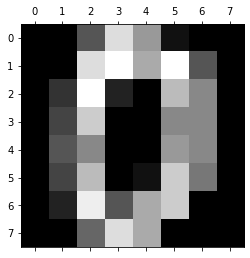

Predict: 1
Label: 1


<Figure size 432x288 with 0 Axes>

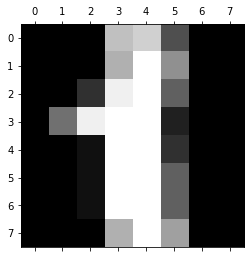

Predict: 2
Label: 2


<Figure size 432x288 with 0 Axes>

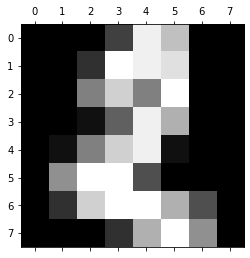

Predict: 3
Label: 3


<Figure size 432x288 with 0 Axes>

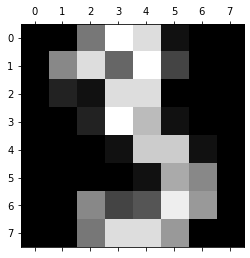

Predict: 4
Label: 4


<Figure size 432x288 with 0 Axes>

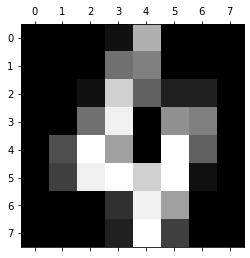

Predict: 5
Label: 5


<Figure size 432x288 with 0 Axes>

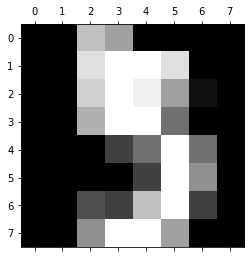

Predict: 6
Label: 6


<Figure size 432x288 with 0 Axes>

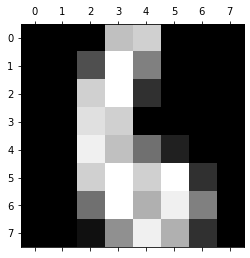

Predict: 7
Label: 7


<Figure size 432x288 with 0 Axes>

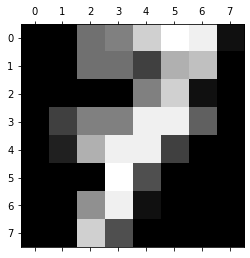

Predict: 8
Label: 8


<Figure size 432x288 with 0 Axes>

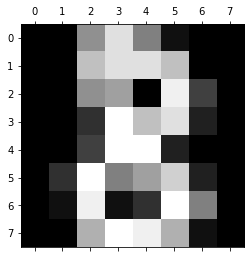

Predict: 9
Label: 9


<Figure size 432x288 with 0 Axes>

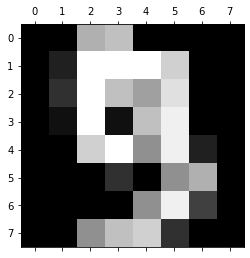

In [ ]:
for i in range(10):
  image_plot(i, X, y)

**References**

1. Drori, I. (2022). The Science of Deep Learning. Cambridge: Cambridge University Press. doi:10.1017/9781108891530  
 https://www.cambridge.org/highereducation/books/the-science-of-deep-learning/23B3CE5B09590BD9E30474C850FA5358#overview

2.  https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook

3.  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

4. https://machinelearningmastery.com/softmax-activation-function-with-python
